# Neural network categorising the MNIST data set

In [8]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_der, cross_entropy, cross_entropy_der, leaky_ReLU, leaky_ReLU_der
from nn_class_classification import NeuralNetwork

In [2]:
# Fetch the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testing different numbers of layers and nodes

In [5]:
np.random.seed(42)

layer_no = [1,2]
layer_sizes = [50,100,200,300]

accuracies = np.zeros((2,4))

inputs = X_train
targets = y_train

for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        layer_output_sizes = [layer_sizes[j]] * layer_no[i] + [10]
        activation_funcs = [leaky_ReLU]*layer_no[i] + [softmax]
        activation_ders = [leaky_ReLU_der]*layer_no[i] + [None]

        NN = NeuralNetwork(
            X_train,
            targets,
            layer_output_sizes,
            activation_funcs,
            activation_ders,
            cross_entropy,
            None,
        )
        NN.train_network_stochastic_gd(lr_method="ADAM")

        test_scores = NN.predict(X_test)
        test_predict = np.argmax(test_scores, axis=1)
        
        accuracy = accuracy_score(y_test, test_predict)
        accuracies[i,j] = accuracy

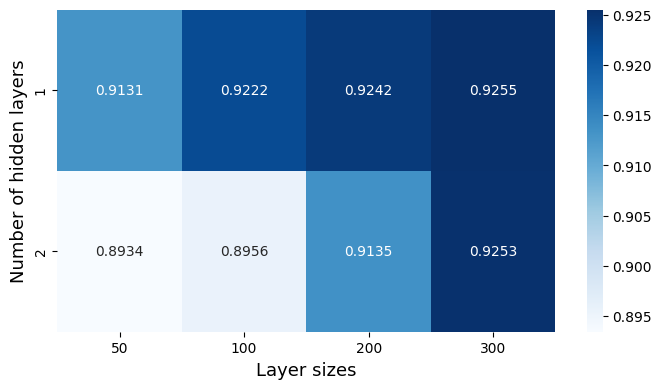

In [14]:
plt.figure(figsize=(7,4))
ax = sns.heatmap( accuracies, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True )

ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)

plt.tight_layout()
plt.savefig("../Figures/MNIST_heatmap_accuracies_layers.png", dpi=300, bbox_inches="tight")
plt.show()

## Testing different lamdas

## Testing different training methods
Using best perfoming network from above
One hidden layer with 100 nodes

In [26]:
np.random.seed(42)

# One layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [200, 10]
activation_funcs = [leaky_ReLU, softmax]
activation_ders = [leaky_ReLU_der, None]

inputs = X_train
targets = y_train

NN = NeuralNetwork(
    X_train,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    None,
    L2=True,
    lmbda=1e-5
)

NN.train_network_stochastic_gd(lr_method='ADAM')



In [27]:
test_scores = NN.predict(X_test)
test_predict = np.argmax(test_scores, axis=1)
targets = y_test


accuracy = accuracy_score(targets, test_predict)
print('Accuracy: ', accuracy)
# accuracies.append(accuracy)

Accuracy:  0.9255714285714286


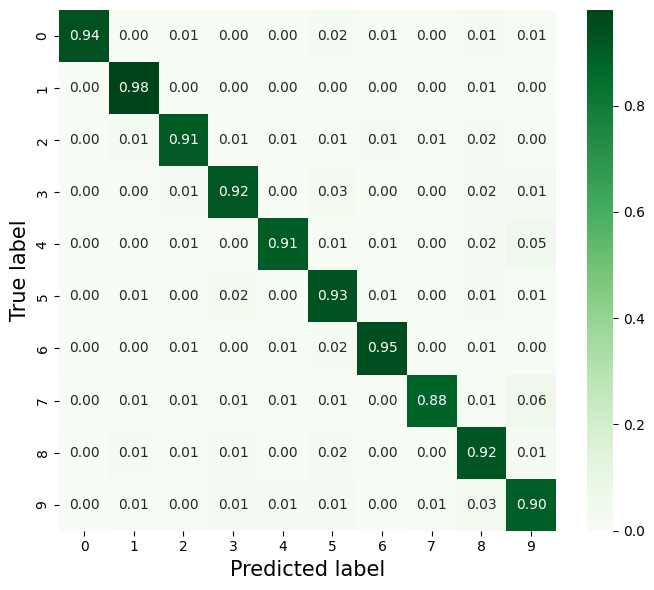

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_scores = NN.predict(X_test)
y_pred = np.argmax(test_scores, axis=1)

# Confusion matrix from scikit-learn
cm = confusion_matrix(y_test, y_pred)


cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.tight_layout()
plt.savefig('../Figures/confusion_matrix_200_stoch_gd_ADAM.png', dpi=300, bbox_inches='tight')
plt.show()